# Sujet 6 : Autour du Paradoxe de Simpson

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

## Préparation

Chargement des données

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

csv_url = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false'
raw_data = pd.read_csv(csv_url)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

## 1. Calcul des taux de moratlité globaux

Trie des données brutes par catégories fumeueses / non fumeuses et vivantes / décédées.

In [6]:
smoker = raw_data[raw_data['Smoker'] == 'Yes']
non_smoker = raw_data[raw_data['Smoker'] == 'No']

smoker_alive = smoker[smoker['Status'] == 'Alive']
smoker_dead = smoker[smoker['Status'] == 'Dead']
non_smoker_alive = non_smoker[non_smoker['Status'] == 'Alive']
non_smoker_dead = non_smoker[non_smoker['Status'] == 'Dead']

### Calcul des effectifs :

In [17]:
nb_sma = len(smoker_alive)
nb_smd = len(smoker_dead)
nb_nsma = len(non_smoker_alive)
nb_nsmd = len(non_smoker_dead)
  

tab = pd.DataFrame({'': ['Fumeur', 'Non Fumeur', 'Total'],
       'Vivant': [nb_sma, nb_nsma, nb_sma + nb_nsma],
       'Décédé': [nb_smd, nb_nsmd, nb_sma + nb_nsmd],
       'Total': [nb_nsma + nb_sma, nb_nsmd + nb_smd, nb_sma + nb_smd + nb_nsma + nb_nsmd]
      }, columns = ['', 'Vivant', 'Décédé', 'Total'])
tab

Vivant  Décédé  Total
0      Fumeur     443     139    945
1  Non Fumeur     502     230    369
2       Total     945     673   1314

### Calcul des taux de mortalité :

In [22]:
print(f'Taux de mortalité chez les fumeuses: {nb_smd / (nb_smd + nb_sma):.3f}')
print(f'Taux de mortalité chez les non-fumeuses: {nb_nsmd / (nb_nsmd + nb_nsma):.3f}')


Taux de mortalité chez les fumeuses: 0.239
Taux de mortalité chez les non-fumeuses: 0.314


On peut constater étonnamment que le taux de mortalité est plus élevé chez les femmes non-fumeuses que ches les femmes fumeuses.

## 2. Calcul des taux de moratlité par tranche d'age

On décide maintenant de calculer les taux de mortalité par tranche d'age : : 18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans.

In [40]:
slices = [(int(min(raw_data['Age'])), 34), (35, 54), (55, 64), (65, int(max(raw_data['Age'])))]

rates = {}
nbs = {}

for sli in slices:
    filter_data = raw_data[sli[0] <= raw_data['Age']]
    filter_data = filter_data[filter_data['Age'] < sli[1]]
    
    smoker = filter_data[filter_data['Smoker'] == 'Yes']
    non_smoker = filter_data[filter_data['Smoker'] == 'No']

    smoker_alive = smoker[smoker['Status'] == 'Alive']
    smoker_dead = smoker[smoker['Status'] == 'Dead']
    non_smoker_alive = non_smoker[non_smoker['Status'] == 'Alive']
    non_smoker_dead = non_smoker[non_smoker['Status'] == 'Dead']
    
    nbs[sli] = (len(smoker),len(non_smoker))
    rates[sli] = (len(smoker_dead) / len(smoker), len(non_smoker_dead) / len(non_smoker))
    
print('Taux de mortalité :')
tab = pd.DataFrame({'Age': slices,
       'Fumeur': [rates[sli][0] for sli in slices],
       'Non fumeur': [rates[sli][1] for sli in slices],
      }, columns = ['Age', 'Fumeur', 'Non fumeur'])
tab

Taux de mortalité :


Age    Fumeur  Non fumeur
0   (18, 34)  0.027933    0.027397
1   (35, 54)  0.170306    0.099476
2   (55, 64)  0.443478    0.327731
3  (65, 999)  0.857143    0.854922

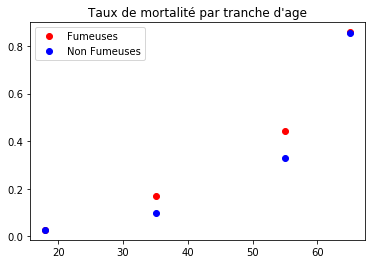

In [39]:
x = [sli[0] for sli in slices]
pl1, = plt.plot(x, [rates[sli][0] for sli in slices], 'or')
pl2, = plt.plot(x, [rates[sli][1] for sli in slices], 'ob')
plt.legend([pl1, pl2], ['Fumeuses', 'Non Fumeuses'])
plt.title("Taux de mortalité par tranche d'age")
plt.show()

Ces résultats semblent contredire les résultats obtenus lors de la première partie. En effet On constate que pour chaque tranche d'age prise séparément, le taux de mortalité est plus élevé chez les fumeuses que chez les non-fumeuses. Cela semble bien illustrer le paradoxe de Simpson. Ces résultats contradictoires peuvent-être expliqués en affichant les effectifs de chaque catégorie:

In [41]:
tab = pd.DataFrame({'Age': slices,
       'Fumeur': [nbs[sli][0] for sli in slices],
       'Non fumeur': [nbs[sli][1] for sli in slices],
      }, columns = ['Age', 'Fumeur', 'Non fumeur'])
tab

Age  Fumeur  Non fumeur
0   (18, 34)     179         219
1   (35, 54)     229         191
2   (55, 64)     115         119
3  (65, 999)      49         193

On peut constater que la réparttion des fumeuses / non fumeuses est relativement équilibrée par tranche d'age, mis à part pour la dernière tranche 65+ ans. En effet, dans cet age, le nombre de non fumeuses est 4 fois supérieur. Or c'est aussi dans cette tranche qu'on enregistre logiquement le plus haut taux de mortalité, et ce quelle que soit la catégorie. Ainsi, ce grand nombre de personnes agées ayant participé à l'étude couplé au fort taux de mortalité pour cette tranche d'age augmente fortement le taux de mortalité total pour les non fuemurs, ce qui est moins le cas chez les fumeurs. Cela peut être confirmé en calculant les taux de mortalité totaux en retirant les 65+ ans:

In [101]:
filter_data = raw_data[raw_data['Age'] < 65]

smoker = filter_data[filter_data['Smoker'] == 'Yes']
non_smoker = filter_data[filter_data['Smoker'] == 'No']

smoker_alive = smoker[smoker['Status'] == 'Alive']
smoker_dead = smoker[smoker['Status'] == 'Dead']
non_smoker_alive = non_smoker[non_smoker['Status'] == 'Alive']
non_smoker_dead = non_smoker[non_smoker['Status'] == 'Dead']

print(f'Taux de mortalité chez les fumeuses: {len(smoker_dead) / len(smoker):.3f}')
print(f'Taux de mortalité chez les non-fumeuses: {len(non_smoker_dead) / len(non_smoker):.3f}')


Taux de mortalité chez les fumeuses: 0.182
Taux de mortalité chez les non-fumeuses: 0.121
89.9


## 3. Etude probabilistique

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, nous réalisons une régression logistique. 

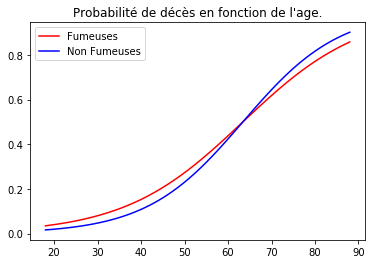

In [103]:
import numpy as np
from sklearn.linear_model import LogisticRegression

def list_to_array(l):
    return np.array([[i] for i in l])

probs = []

xs = list(range(int(min(raw_data['Age'])), int(max(raw_data['Age']))))
for fil in ['Yes', 'No']:
    filter_data = raw_data[raw_data['Smoker'] == fil]
    ages = filter_data['Age']
    deaths = (filter_data['Status'] == 'Dead').astype(int)

    model = LogisticRegression(solver='liblinear', random_state=0).fit(list_to_array(ages), deaths)
    probs.append(model.predict_proba(list_to_array(xs))[:,1].tolist())
    
pl1 = plt.plot(xs, probs[0], '-r', label='Fumeuses')
pl2 = plt.plot(xs , probs[1], '-b', label='Non Fumeuses')
plt.title("Probabilité de décès en fonction de l'age.")
plt.legend()
plt.show()   
    

On peut constater sur ce graphique que jusqu'à 65 ans, fumer semble augmeneter la probabilité de décès sur une période de 20 ans, ce qui prouve une diminution de l'espérance de vie. La tendance s'inverse à partir de 65 ans, explicable en partie par la différence d'effectifs dans cette tranche d'age.